In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

np.warnings.filterwarnings('ignore')
%matplotlib inline


In [27]:
data = pd.read_excel('C:\\Users\hugep\Documents\March Madness-new\March Madness 2018\Data\Data_generated.xlsx',sheet='Sheet1')
data.describe()

,Season,result,Adjde_diff,Adjoe_diff,Adjtempo_diff,Arate_diff,Blockpct_diff,De_diff,F3grate_diff,Fg2pct_diff,...,Oppf3grate_diff,Oppfg2pct_diff,Oppfg3pct_diff,Oppftpct_diff,Oppstlrate_diff,Rpi_rating_diff,Seed_diff,Stlrate_diff,Temporate_diff,Preseason_winrate_diff
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,2009.637780,0.523856,-0.396469,0.422502,0.068815,0.062566,-0.018963,-0.268363,-0.003269,-0.027288,...,-0.071892,-0.114511,0.032281,-0.037367,-0.012096,0.003320,-0.368062,0.017286,0.058518,0.054187
std,4.588448,0.499674,6.592531,8.269199,4.404344,7.006210,4.478236,6.209499,7.317074,3.918753,...,5.135270,3.936761,3.032085,3.070816,1.631654,0.542585,7.510543,2.433162,4.742147,1.418783
min,2002.000000,0.000000,-24.463900,-26.797900,-13.627600,-21.384200,-13.561300,-25.348300,-24.232300,-13.552600,...,-17.469500,-12.588966,-7.693400,-8.822100,-5.220000,-2.110000,-15.000000,-8.270000,-14.936700,-4.705882
25%,2006.000000,0.000000,-4.409000,-4.952650,-2.611100,-4.923950,-2.856514,-4.374000,-4.814950,-2.582400,...,-3.286206,-2.815100,-2.071300,-2.170650,-1.150000,-0.280000,-7.000000,-1.575000,-2.962050,-0.879685
50%,2010.000000,1.000000,-0.307900,0.438900,0.062500,0.182700,-0.035500,-0.112900,-0.121200,0.032900,...,0.004400,-0.186900,-0.043500,-0.061300,-0.020000,-0.010000,0.000000,-0.090000,0.087000,0.086207
75%,2014.000000,1.000000,3.707250,5.698450,2.773150,4.663050,2.866050,3.617050,5.070450,2.479950,...,3.213500,2.577150,2.202050,1.995300,1.060000,0.260000,5.000000,1.605000,3.037600,0.937500
max,2017.000000,1.000000,21.124800,26.866300,19.116500,21.929200,14.367700,18.460100,26.233000,13.383607,...,15.262600,12.526100,9.290500,10.170700,5.490000,1.950000,15.000000,9.100000,20.400900,5.757576


In [28]:
New_data=data.as_matrix()
np.random.shuffle(New_data)
Train_Y_1= New_data[:727,4:5]
Train_X_1= New_data[:727,5:]
Test_Y_1= New_data[727:,4:5]
Test_X_1= New_data[727:,5:]
Train_Y=Train_Y_1.T
Train_X=Train_X_1.T
Test_Y=Test_Y_1.T
Test_X=Test_X_1.T
m_train = Train_X.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Train_X shape: " + str(Train_X.shape))
print ("Train_y shape: " + str(Train_Y.shape))
print ('Test_x shape: '+str(Test_X.shape))
print ('Test_y shape: '+str(Test_Y.shape))

Number of training examples: 23
Train_X shape: (23, 727)
Train_y shape: (1, 727)
Test_x shape: (23, 300)
Test_y shape: (1, 300)


In [29]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) 

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        

        
    return parameters

In [30]:
def linear_forward(A,W,b):
    
    Z=np.array(np.dot(W,A)+b,dtype=np.float32)

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A,W,b)
    
    return Z, cache

In [31]:
def sigmoid(Z):
    S = 1/(1+np.exp(-Z))
    cache= Z
    return S, cache

In [32]:
def tanh(Z):
    T = (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    cache= Z
    return T, cache

In [33]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation =='sigmoid':
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
    elif activation =='tanh':
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = tanh(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    
    return A, cache
        

In [34]:
def L_model_forward(X, parameters):
    """
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward()
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> tanh]*(L-1).
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)],parameters['b'+str(l)], activation='tanh')
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. 
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)],parameters['b'+str(L)], activation = 'sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [35]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y)+np.multiply(np.log(1-AL),(1-Y)))/m
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [36]:
def linear_backward(dZ, cache):
    A_prev,W,b=cache
    m = A_prev.shape[1]
    
    dW=1/m*np.dot(dZ, A_prev.T)
    db=1/m*np.sum(dZ,axis=1, keepdims=True)
    dA_prev=np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [37]:
def tanh_backward(dA, activation_cache):
    g = activation_cache*(1-activation_cache)
    dZ = dA*g
    return dZ

In [38]:
def sigmoid_backward(dA, activation_cache):
    g = 1-activation_cache
    dZ = dA*g
    return dZ

In [39]:
def linear_activation_backward(dA,cache,activation):
    linear_cache, activation_cache = cache
    if activation == 'tanh':
        dZ=tanh_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ, linear_cache)
    elif activation == 'sigmoid':
        dZ=sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [40]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "tanh" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL)-np.divide((1-Y),(1-AL)))
    
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "tanh")
        
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        

    return grads

In [41]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):p
        parameters["W" + str(l+1)] = parameters['W'+str(l+1)]-learning_rate*grads['dW'+str(l+1)]
        parameters["b" + str(l+1)] = parameters['b'+str(l+1)]-learning_rate*grads['db'+str(l+1)]
        
    return parameters

In [42]:
layers_dims=(23,20,7,5,1)

In [43]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                      
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters,grads,learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.690963
Cost after iteration 200: 0.690458
Cost after iteration 300: 0.690330
Cost after iteration 400: 0.690296
Cost after iteration 500: 0.690287
Cost after iteration 600: 0.690284
Cost after iteration 700: 0.690283
Cost after iteration 800: 0.690283
Cost after iteration 900: 0.690283
Cost after iteration 1000: 0.690283
Cost after iteration 1100: 0.690283
Cost after iteration 1200: 0.690283
Cost after iteration 1300: 0.690283
Cost after iteration 1400: 0.690283
Cost after iteration 1500: 0.690283
Cost after iteration 1600: 0.690283
Cost after iteration 1700: 0.690283
Cost after iteration 1800: 0.690283
Cost after iteration 1900: 0.690283
Cost after iteration 2000: 0.690283
Cost after iteration 2100: 0.690283
Cost after iteration 2200: 0.690283
Cost after iteration 2300: 0.690283
Cost after iteration 2400: 0.690283


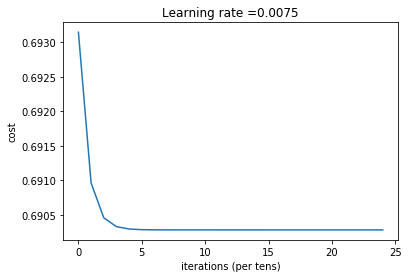

In [44]:
parameters = L_layer_model(Train_X, Train_Y, layers_dims, num_iterations = 2500, print_cost = True)

In [63]:
def predict(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> tanh]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)],parameters['b'+str(l)], activation='tanh')
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. 
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)],parameters['b'+str(L)], activation = 'sigmoid')
    caches.append(cache)

    
    
    for i in range(AL.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if AL[0,i].all() > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    
    return Y_prediction

In [64]:
def accuracy(X,Y,parameters):
    Y_prediction = predict(X,parameters)
    acrc=format(100 - np.mean(np.abs(Y_prediction - Y)) * 100)
    
    return acrc

In [65]:
Prediction_Train = accuracy(Train_X, Train_Y, parameters)
Prediction_Test = accuracy(Test_X, Test_Y, parameters)
print('Training accuracy',Prediction_Train)
print('Test accuracy',Prediction_Test)

Training accuracy 53.782668500687755
Test accuracy 49.0
